In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import xml.etree.ElementTree as ET
from sklearn.preprocessing import LabelEncoder

In [18]:
def load_images_with_annotations(images_folder, annotations_folder, image_size=(64, 64)):
    images = []
    labels = []
    label_map = {}
    current_label = 0
    
    for breed_folder in os.listdir(images_folder):
        breed_path = os.path.join(images_folder, breed_folder)
        if os.path.isdir(breed_path):
            for image_file in os.listdir(breed_path):
                image_path = os.path.join(breed_path, image_file)
                annotation_path = os.path.join(annotations_folder, breed_folder, image_file.split('.')[0])

                # Read image
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, image_size)
                    images.append(image)
                else:
                    continue

                # Read and parse annotation
                try:
                    tree = ET.parse(annotation_path)
                    root = tree.getroot()
                    breed_name = root.find('./object/name').text

                    if breed_name not in label_map:
                        label_map[breed_name] = current_label
                        current_label += 1
                    labels.append(label_map[breed_name])
                except Exception as e:
                    print(f"Error reading/processing annotation for {image_file}: {e}")
                    images.pop()

    return np.array(images), np.array(labels), label_map

In [19]:
images_folder = 'Data/Images'
annotations_folder = 'Data/Annotations'
images, labels, breed_map = load_images_with_annotations(images_folder, annotations_folder)

In [20]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [21]:
# Normalize and split the data
X_train, X_val, y_train, y_val = train_test_split(images / 255.0, labels, test_size=0.2, random_state=42)

## Step 2: Build CNN Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [23]:
def build_model(num_filters, num_nodes):
    model = Sequential([
        Conv2D(num_filters, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(num_nodes, activation='relu'),
        Dense(4, activation='softmax')
    ])
    return model

## Step 3: Compile the Model

In [24]:
model = build_model(8, 16)  # Start with 8 filters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model

## Step 4: Train the Model

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 1s 26ms/step - loss: 1.5257 - accuracy: 0.2529 - val_loss: 1.3845 - val_accuracy: 0.3182
Epoch 2/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3858 - accuracy: 0.2512 - val_loss: 1.3853 - val_accuracy: 0.2792
Epoch 3/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3857 - accuracy: 0.2496 - val_loss: 1.3850 - val_accuracy: 0.2792
Epoch 4/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3842 - accuracy: 0.2577 - val_loss: 1.3668 - val_accuracy: 0.3766
Epoch 5/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3551 - accuracy: 0.3312 - val_loss: 1.3373 - val_accuracy: 0.3896
Epoch 6/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3373 - accuracy: 0.3361 - val_loss: 1.3301 - val_accuracy: 0.4026
Epoch 7/20
20/20 [==============================] - 0s 21ms/step - loss: 1.3239 - accuracy: 0.3377 - val_loss: 1.3179 - val_accuracy: 0.4481
Epoch 8/20
20

## Step 5: Plot Learning Curves

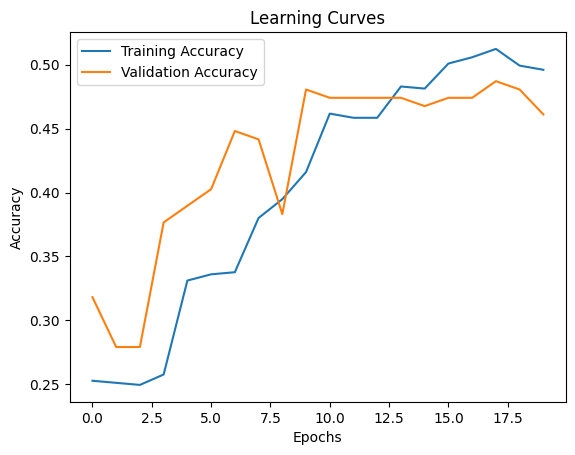

In [27]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curves(history)

**Banner ID: 9164609**

## Step 6: Train the CNN using 2 other number of nodes in the hidden layer (iv): 8 and 32 with all other parameters unchanged

In [12]:
# Model with 8 nodes in the hidden layer
model_8_nodes = build_model(8, 8)  # 8 filters in the conv layer, 8 nodes in the hidden layer
model_8_nodes.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Model with 32 nodes in the hidden layer
model_32_nodes = build_model(8, 32)  # 8 filters in the conv layer, 32 nodes in the hidden layer
model_32_nodes.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Step 7: Train the Models

In [14]:
history_8_nodes = model_8_nodes.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 1s 27ms/step - loss: 1.3579 - accuracy: 0.3475 - val_loss: 1.3210 - val_accuracy: 0.3377
Epoch 2/20
20/20 [==============================] - 0s 20ms/step - loss: 1.2789 - accuracy: 0.4111 - val_loss: 1.2921 - val_accuracy: 0.3377
Epoch 3/20
20/20 [==============================] - 0s 19ms/step - loss: 1.2271 - accuracy: 0.4029 - val_loss: 1.2838 - val_accuracy: 0.3571
Epoch 4/20
20/20 [==============================] - 0s 20ms/step - loss: 1.2117 - accuracy: 0.4160 - val_loss: 1.2683 - val_accuracy: 0.3896
Epoch 5/20
20/20 [==============================] - 0s 21ms/step - loss: 1.1485 - accuracy: 0.4388 - val_loss: 1.2894 - val_accuracy: 0.3831
Epoch 6/20
20/20 [==============================] - 0s 20ms/step - loss: 1.1665 - accuracy: 0.4617 - val_loss: 1.2852 - val_accuracy: 0.4416
Epoch 7/20
20/20 [==============================] - 0s 22ms/step - loss: 1.0922 - accuracy: 0.4796 - val_loss: 1.2657 - val_accuracy: 0.4481
Epoch 8/20
20

In [15]:
history_32_nodes = model_32_nodes.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 1s 29ms/step - loss: 1.6891 - accuracy: 0.2855 - val_loss: 1.4152 - val_accuracy: 0.2727
Epoch 2/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3405 - accuracy: 0.3703 - val_loss: 1.3192 - val_accuracy: 0.3636
Epoch 3/20
20/20 [==============================] - 0s 20ms/step - loss: 1.2829 - accuracy: 0.4144 - val_loss: 1.2745 - val_accuracy: 0.4221
Epoch 4/20
20/20 [==============================] - 0s 21ms/step - loss: 1.2407 - accuracy: 0.4029 - val_loss: 1.2439 - val_accuracy: 0.4416
Epoch 5/20
20/20 [==============================] - 0s 21ms/step - loss: 1.2041 - accuracy: 0.4323 - val_loss: 1.2362 - val_accuracy: 0.4091
Epoch 6/20
20/20 [==============================] - 0s 21ms/step - loss: 1.1495 - accuracy: 0.4845 - val_loss: 1.2622 - val_accuracy: 0.3896
Epoch 7/20
20/20 [==============================] - 0s 21ms/step - loss: 1.1076 - accuracy: 0.5269 - val_loss: 1.2192 - val_accuracy: 0.4026
Epoch 8/20
20

## Step 8: Plot Learning Curves

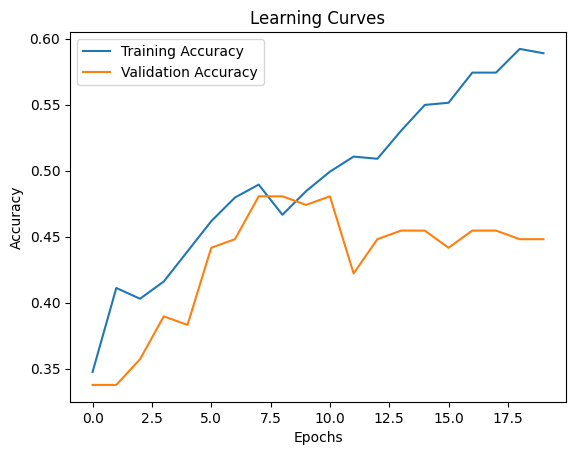

In [16]:
# Plotting the learning curves
plot_learning_curves(history_8_nodes)

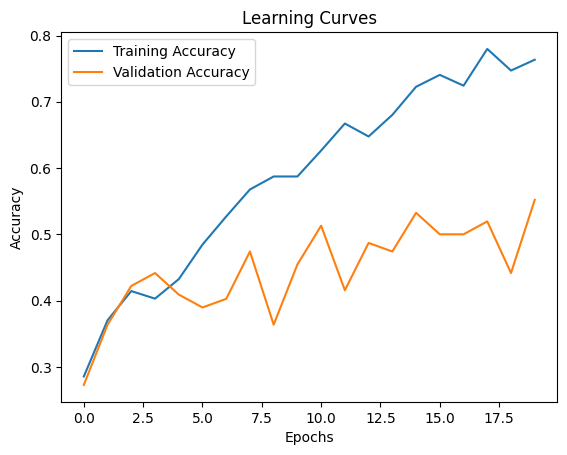

In [17]:
# Plotting the learning curves
plot_learning_curves(history_32_nodes)

Based on the learning curves of the three CNN models:

1. **16 Node CNN**: Likely the most balanced. Ideal if training and validation accuracies are close and high.
2. **8 Node CNN**: Risk of underfitting. Lower capacity could lead to lower accuracies.
3. **32 Node CNN**: Higher risk of overfitting. High training accuracy but potentially lower validation accuracy.

In short, the 16-node model might be just right, the 8-node model could underfit, and the 32-node model might overfit.